In [1]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as scipy
import seaborn as sns
exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### For an easier comprehension, we will rename the columns into their description.

In [2]:
exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

In [3]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


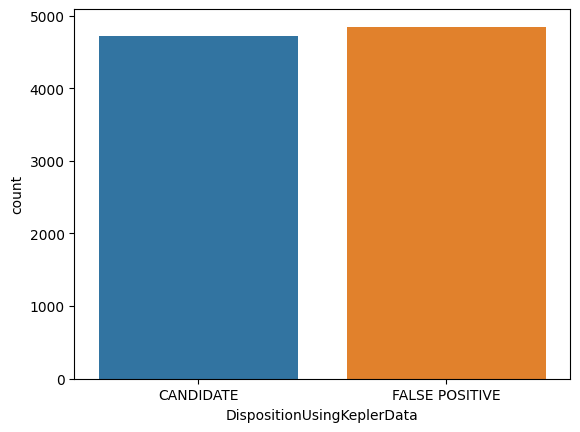

In [4]:
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


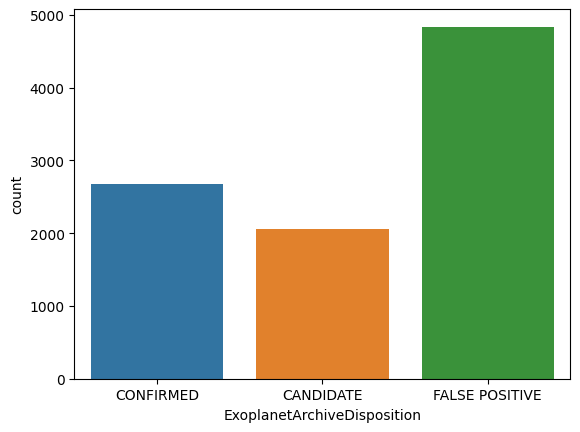

In [5]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

### Explore missing values by finding the percentage of missing values for each column - print as a data frame

In [6]:
missing_values_percentage = (exoplanet_df.isnull().sum() / len(exoplanet_df)) * 100

missing_values_df = pd.DataFrame({'Column name':missing_values_percentage.index, 'Missing percentage':missing_values_percentage.values})

In [7]:
print(exoplanet_df.info())
print('\n')
print(missing_values_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

### Visualize the missing values of the columns with the 5 most percentage of missing value


In [8]:
missing_values_df = missing_values_df.sort_values(by='Missing percentage', ascending=False)

top_five_columns_missing_values = missing_values_df.head(5)

In [9]:
print(top_five_columns_missing_values)

                               Column name  Missing percentage
30       EquilibriumTemperatureLowerUnc, K          100.000000
29       EquilibriumTemperatureUpperUnc, K          100.000000
2                               KeplerName           72.051443
5                         DispositionScore           15.788373
39  StellarEffectiveTemperatureLowerUnc, K            5.050188


### Write a loop/script that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]

In [10]:
def count_outliers(feature):
    # handle non-numeric values by converting them to NaN 
    feature = pd.to_numeric(feature, errors='coerce')
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature < lower_bound) | (feature > upper_bound)
    return outliers.sum()


outliers_count = {}
for column in exoplanet_df.columns:
    outliers = count_outliers(exoplanet_df[column])
    outliers_count[column] = outliers

In [11]:
sorted_outliers_count = dict(sorted(outliers_count.items(), key=lambda item: item[1], reverse=True))

print("Number of outliers for each feature in descending order")
for column, count in sorted_outliers_count.items():
    print(f'{column}: {count}')

Number of outliers for each feature in descending order
koi_fpflag_ss: 2226
CentroidOffsetFalsePositiveFlag: 1889
TransitDepth, ppm: 1798
PlanetaryRadiusUpperUnc, Earthradii: 1716
OrbitalPeriodUpperUnc, days: 1650
OrbitalPeriodLowerUnc, days: 1650
TransitSignal-to-Noise: 1600
OrbitalPeriod, days: 1567
InsolationFluxUpperUnc, Earthflux: 1536
NotTransit-LikeFalsePositiveFlag: 1531
InsolationFluxLowerUnc, Earthflux: 1483
TCEPlanetNumber: 1473
PlanetaryRadius, Earthradii: 1469
InsolationFlux, Earthflux: 1438
PlanetaryRadiusLowerUnc, Earthradii: 1390
StellarRadiusLowerUnc, Solarradii: 1294
EphemerisMatchIndicatesContaminationFalsePositiveFlag: 1148
TransitDepthUpperUnc, ppm: 1084
TransitDepthLowerUnc, ppm: 1084
TransitEpoch, BKJD: 1046
StellarRadius, Solarradii: 985
TransitDurationUpperUnc, hrs: 930
TransitDurationLowerUnc, hrs: 930
TransitDuration, hrs: 869
TransitEpochUpperUnc, BKJD: 838
TransitEpochLowerUnc, BKJD: 838
ImpactParameterUpperUnc: 736
StellarRadiusUpperUnc, Solarradii: 698
St

### Remove columns with 100% missing values 

In [12]:
exoplanet_df = exoplanet_df.dropna(axis=1, how='all')

In [13]:
print(exoplanet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

### Remove irrelevant columns

In [14]:
columns_to_drop = ['KOIName','KeplerName','KepID','TCEDeliver']

exoplanet_df = exoplanet_df.drop(columns_to_drop, axis=1)

In [15]:
print(exoplanet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ExoplanetArchiveDisposition                            9564 non-null   object 
 1   DispositionUsingKeplerData                             9564 non-null   object 
 2   DispositionScore                                       8054 non-null   float64
 3   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 4   koi_fpflag_ss                                          9564 non-null   int64  
 5   CentroidOffsetFalsePositiveFlag                        9564 non-null   int64  
 6   EphemerisMatchIndicatesContaminationFalsePositiveFlag  9564 non-null   int64  
 7   OrbitalPeriod, days                                    9564 non-null   float64
 8   OrbitalPeriodUpperUnc, days                     

### Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, you may choose to impute instead

In [41]:
# DispositionScore contains NaN values. We impute with the mean.

disposition_score_mean_value = exoplanet_df['DispositionScore'].mean()
orbital_period_upper_mean_value = exoplanet_df['OrbitalPeriodUpperUnc, days'].mean()
orbital_period_lower_mean_value = exoplanet_df['OrbitalPeriodLowerUnc, days'].mean()
transit_epoch_upper_mean_value = exoplanet_df['TransitEpochUpperUnc, BKJD'].mean()
transit_epoch_lower_mean_value = exoplanet_df['TransitEpochLowerUnc, BKJD'].mean()
impact_parameter_mean_value = exoplanet_df['ImpactParamete'].mean()
impact_parameter_upper_mean_value = exoplanet_df['ImpactParameterUpperUnc'].mean()
impact_parameter_lower_mean_value = exoplanet_df['ImpactParameterLowerUnc'].mean()
transit_duration_upper_mean_value = exoplanet_df['TransitDurationUpperUnc, hrs'].mean()
transit_duration_lower_mean_value = exoplanet_df['TransitDurationLowerUnc, hrs'].mean()
transit_depth_mean_value = exoplanet_df['TransitDepth, ppm'].mean()
transit_depth_upper_mean_value = exoplanet_df['TransitDepthUpperUnc, ppm'].mean()
transit_depth_lower_mean_value = exoplanet_df['TransitDepthLowerUnc, ppm'].mean()
planetary_radius_mean_value = exoplanet_df['PlanetaryRadius, Earthradii'].mean()
planetary_radius_upper_mean_value = exoplanet_df['PlanetaryRadiusUpperUnc, Earthradii'].mean()
planetary_radius_lower_mean_value = exoplanet_df['PlanetaryRadiusLowerUnc, Earthradii'].mean()
equilibrum_temperature_mean_value = exoplanet_df['EquilibriumTemperature, K'].mean()
insolation_flux_mean_value = exoplanet_df['InsolationFlux, Earthflux'].mean()
insolation_flux_upper_mean_value = exoplanet_df['InsolationFluxUpperUnc, Earthflux'].mean()
insolation_flux_lower_mean_value = exoplanet_df['InsolationFluxLowerUnc, Earthflux'].mean()
transit_signal_mean_value = exoplanet_df['TransitSignal-to-Noise'].mean()
stellar_effective_temperature_mean_value = exoplanet_df['StellarEffectiveTemperature, K'].mean()
stellar_effective_temperature_upper_mean_value = exoplanet_df['StellarEffectiveTemperatureUpperUnc, K'].mean()
stellar_effective_temperature_lower_mean_value = exoplanet_df['StellarEffectiveTemperatureLowerUnc, K'].mean()
stellar_surface_gravity_mean_value = exoplanet_df['StellarSurfaceGravity, log10(cm/s^2)'].mean()
stellar_surface_gravity_upper_mean_value = exoplanet_df['StellarSurfaceGravityUpperUnc, log10(cm/s^2)'].mean()
stellar_surface_gravity_lower_mean_value = exoplanet_df['StellarSurfaceGravityLowerUnc, log10(cm/s^2)'].mean()
stellar_radius_mean_value = exoplanet_df['StellarRadius, Solarradii'].mean()
stellar_radius_upper_mean_value = exoplanet_df['StellarRadiusUpperUnc, Solarradii'].mean()
stellar_radius_lower_mean_value = exoplanet_df['StellarRadiusLowerUnc, Solarradii'].mean()
kepler_band_mean_value = exoplanet_df['Kepler-band, mag'].mean()

# Impute with the most frequent value (mode)
tce_planet_number_mode_value = exoplanet_df['TCEPlanetNumber'].mode().iloc[0]

exoplanet_df['DispositionScore'].fillna(disposition_score_mean_value, inplace=True)
exoplanet_df['OrbitalPeriodUpperUnc, days'].fillna(orbital_period_upper_mean_value, inplace=True)
exoplanet_df['OrbitalPeriodLowerUnc, days'].fillna(orbital_period_upper_mean_value, inplace=True)
exoplanet_df['TransitEpochUpperUnc, BKJD'].fillna(transit_epoch_upper_mean_value, inplace=True)
exoplanet_df['TransitEpochLowerUnc, BKJD'].fillna(transit_epoch_lower_mean_value, inplace=True)
exoplanet_df['ImpactParamete'].fillna(impact_parameter_mean_value, inplace=True)
exoplanet_df['ImpactParameterUpperUnc'].fillna(impact_parameter_upper_mean_value, inplace=True)
exoplanet_df['ImpactParameterLowerUnc'].fillna(impact_parameter_lower_mean_value, inplace=True)
exoplanet_df['TransitDurationUpperUnc, hrs'].fillna(transit_duration_upper_mean_value, inplace=True)
exoplanet_df['TransitDurationLowerUnc, hrs'].fillna(transit_duration_lower_mean_value, inplace=True)
exoplanet_df['TransitDepth, ppm'].fillna(transit_depth_mean_value, inplace=True)
exoplanet_df['TransitDepthUpperUnc, ppm'].fillna(transit_depth_upper_mean_value, inplace=True)
exoplanet_df['TransitDepthLowerUnc, ppm'].fillna(transit_depth_lower_mean_value, inplace=True)
exoplanet_df['PlanetaryRadius, Earthradii'].fillna(planetary_radius_mean_value, inplace=True)
exoplanet_df['PlanetaryRadiusUpperUnc, Earthradii'].fillna(planetary_radius_upper_mean_value, inplace=True)
exoplanet_df['PlanetaryRadiusLowerUnc, Earthradii'].fillna(planetary_radius_lower_mean_value, inplace=True)
exoplanet_df['EquilibriumTemperature, K'].fillna(equilibrum_temperature_mean_value, inplace=True)
exoplanet_df['InsolationFlux, Earthflux'].fillna(insolation_flux_mean_value, inplace=True)
exoplanet_df['InsolationFluxUpperUnc, Earthflux'].fillna(insolation_flux_upper_mean_value, inplace=True)
exoplanet_df['InsolationFluxLowerUnc, Earthflux'].fillna(insolation_flux_lower_mean_value, inplace=True)
exoplanet_df['TransitSignal-to-Noise'].fillna(transit_signal_mean_value, inplace=True)
exoplanet_df['StellarEffectiveTemperature, K'].fillna(stellar_effective_temperature_mean_value, inplace=True)
exoplanet_df['StellarEffectiveTemperatureUpperUnc, K'].fillna(stellar_effective_temperature_upper_mean_value, inplace=True)
exoplanet_df['StellarEffectiveTemperatureLowerUnc, K'].fillna(stellar_effective_temperature_lower_mean_value, inplace=True)
exoplanet_df['StellarSurfaceGravity, log10(cm/s^2)'].fillna(stellar_surface_gravity_mean_value, inplace=True)
exoplanet_df['StellarSurfaceGravityUpperUnc, log10(cm/s^2)'].fillna(stellar_surface_gravity_upper_mean_value, inplace=True)
exoplanet_df['StellarSurfaceGravityLowerUnc, log10(cm/s^2)'].fillna(stellar_surface_gravity_lower_mean_value, inplace=True)
exoplanet_df['StellarRadius, Solarradii'].fillna(stellar_radius_mean_value, inplace=True)
exoplanet_df['StellarRadiusUpperUnc, Solarradii'].fillna(stellar_radius_upper_mean_value, inplace=True)
exoplanet_df['StellarRadiusLowerUnc, Solarradii'].fillna(stellar_radius_lower_mean_value, inplace=True)
exoplanet_df['Kepler-band, mag'].fillna(kepler_band_mean_value, inplace=True)

exoplanet_df['TCEPlanetNumber'].fillna(tce_planet_number_mode_value, inplace=True)

# Could have done it with a dictionary and a function, maybe do it for exam ?

In [42]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ExoplanetArchiveDisposition                            9564 non-null   object 
 1   DispositionUsingKeplerData                             9564 non-null   object 
 2   DispositionScore                                       9564 non-null   float64
 3   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 4   koi_fpflag_ss                                          9564 non-null   int64  
 5   CentroidOffsetFalsePositiveFlag                        9564 non-null   int64  
 6   EphemerisMatchIndicatesContaminationFalsePositiveFlag  9564 non-null   int64  
 7   OrbitalPeriod, days                                    9564 non-null   float64
 8   OrbitalPeriodUpperUnc, days                     

### Drop false positive values in ExoplanetArchiveDisposition column to create a more balanced binary classification problem

In [43]:
exoplanet_df = exoplanet_df[exoplanet_df['ExoplanetArchiveDisposition'] != 'FALSE POSITIVE']

In [44]:
print(exoplanet_df)

     ExoplanetArchiveDisposition DispositionUsingKeplerData  DispositionScore  \
0                      CONFIRMED                  CANDIDATE             1.000   
1                      CONFIRMED                  CANDIDATE             0.969   
2                      CANDIDATE                  CANDIDATE             0.000   
4                      CONFIRMED                  CANDIDATE             1.000   
5                      CONFIRMED                  CANDIDATE             1.000   
...                          ...                        ...               ...   
9538                   CANDIDATE                  CANDIDATE             0.843   
9542                   CANDIDATE                  CANDIDATE             0.189   
9552                   CANDIDATE                  CANDIDATE             0.519   
9560                   CANDIDATE                  CANDIDATE             0.497   
9562                   CANDIDATE                  CANDIDATE             0.092   

      NotTransit-LikeFalseP

In [45]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 9562
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ExoplanetArchiveDisposition                            4725 non-null   object 
 1   DispositionUsingKeplerData                             4725 non-null   object 
 2   DispositionScore                                       4725 non-null   float64
 3   NotTransit-LikeFalsePositiveFlag                       4725 non-null   int64  
 4   koi_fpflag_ss                                          4725 non-null   int64  
 5   CentroidOffsetFalsePositiveFlag                        4725 non-null   int64  
 6   EphemerisMatchIndicatesContaminationFalsePositiveFlag  4725 non-null   int64  
 7   OrbitalPeriod, days                                    4725 non-null   float64
 8   OrbitalPeriodUpperUnc, days                          

### Create a correlation matrix and discuss, then drop appropiate columns

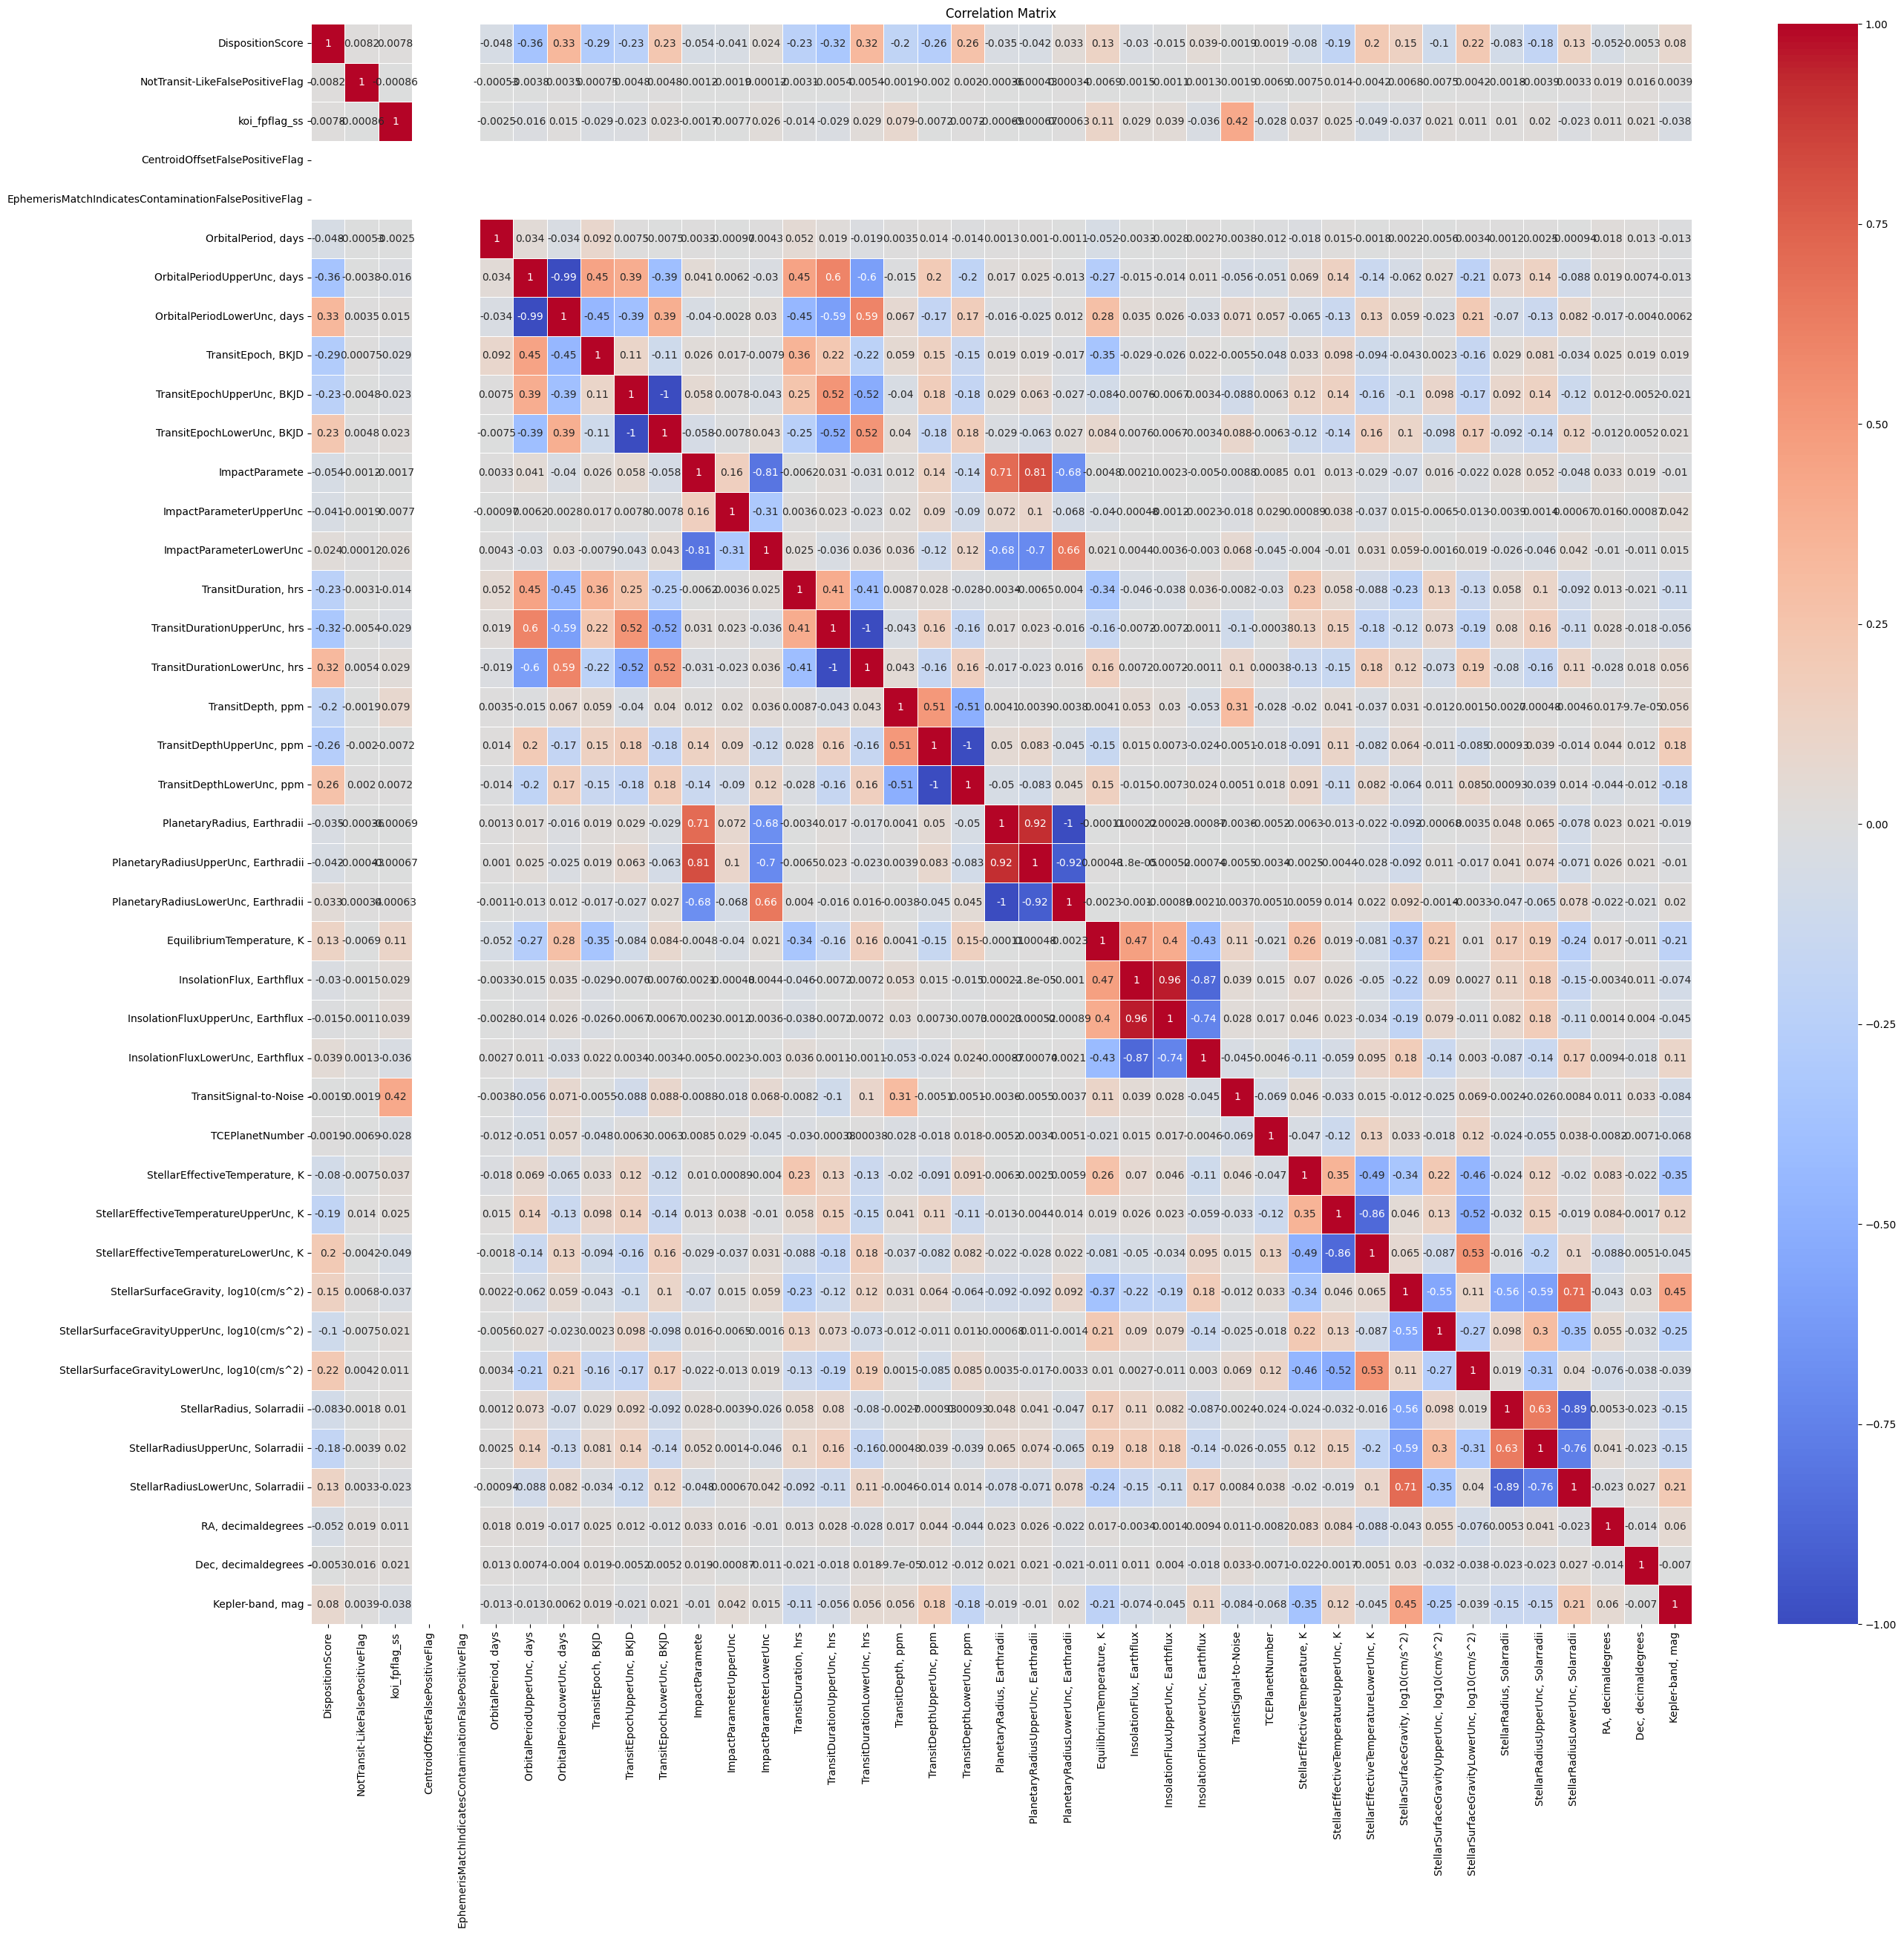

In [49]:
# Create a DataFrame with only numeric columns
numeric_exoplanet_df = exoplanet_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_exoplanet_df.corr()

plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Change values in ExoplanetArchiveDisposition and DispositionUsingKeplerData

In [50]:
mapping = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}

exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].replace(mapping)
exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].replace(mapping)

exoplanet_df = exoplanet_df.drop(['ExoplanetArchiveDisposition','DispositionUsingKeplerData'], axis=1)

print(exoplanet_df[['ArchiveDispositionStatus','KeplerDispositionStatus']])
print('\n')
print(exoplanet_df.info())

      ArchiveDispositionStatus  KeplerDispositionStatus
0                            2                        1
1                            2                        1
2                            1                        1
4                            2                        1
5                            2                        1
...                        ...                      ...
9538                         1                        1
9542                         1                        1
9552                         1                        1
9560                         1                        1
9562                         1                        1

[4725 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 9562
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DispositionScore          

In [55]:
numeric_columns = exoplanet_df.select_dtypes(include=['number']).columns

# Create a DataFrame to store the results
summary_stats = pd.DataFrame(columns=['Column', 'Skewness', 'Mean', 'Median', 'Mode'])
summary_stats_list = []

def which_skewness(skewness):
    if skewness > 0.5:
        return 'right'
    elif skewness < 0.5:
        return 'left'
    else:
        return 'aprox sym'
    
# Iterate through numeric columns
for column_name in numeric_columns:
    skewness = exoplanet_df[column_name].skew()
    mean_value = exoplanet_df[column_name].mean()
    median_value = exoplanet_df[column_name].median()
    mode_value = exoplanet_df[column_name].mode()[0]
    
    # Append the results to the summary DataFrame
    column_summary = pd.DataFrame({
        'Column': [column_name],
        'Skewness': [which_skewness(skewness)],
        'Mean': [mean_value],
        'Median': [median_value],
        'Mode': [mode_value],
    })
    summary_stats_list.append(column_summary)
# Print or analyze the summary statistics DataFrame

summary_stats = pd.concat(summary_stats_list, ignore_index=True)

In [56]:
print(summary_stats)

                                               Column Skewness         Mean  \
0                                    DispositionScore     left     0.850563   
1                    NotTransit-LikeFalsePositiveFlag    right     0.099259   
2                                       koi_fpflag_ss    right     0.003386   
3                     CentroidOffsetFalsePositiveFlag     left     0.000000   
4   EphemerisMatchIndicatesContaminationFalsePosit...     left     0.000000   
5                                 OrbitalPeriod, days    right    86.457899   
6                         OrbitalPeriodUpperUnc, days    right     1.001581   
7                         OrbitalPeriodLowerUnc, days     left     0.998565   
8                                  TransitEpoch, BKJD    right   166.944965   
9                          TransitEpochUpperUnc, BKJD    right     1.009670   
10                         TransitEpochLowerUnc, BKJD     left     0.990883   
11                                     ImpactParamet

In [53]:
exoplanet_df['OrbitalPeriodUpperUnc, days'] = np.exp(exoplanet_df['OrbitalPeriodUpperUnc, days'])
exoplanet_df['OrbitalPeriodLowerUnc, days'] = np.exp(exoplanet_df['OrbitalPeriodLowerUnc, days'])
exoplanet_df['TransitEpochUpperUnc, BKJD'] = np.exp(exoplanet_df['TransitEpochUpperUnc, BKJD'])
exoplanet_df['TransitEpochLowerUnc, BKJD'] = np.exp(exoplanet_df['TransitEpochLowerUnc, BKJD'])

In [54]:
print(exoplanet_df)

      DispositionScore  NotTransit-LikeFalsePositiveFlag  koi_fpflag_ss  \
0                1.000                                 0              0   
1                0.969                                 0              0   
2                0.000                                 0              0   
4                1.000                                 0              0   
5                1.000                                 0              0   
...                ...                               ...            ...   
9538             0.843                                 0              0   
9542             0.189                                 0              0   
9552             0.519                                 0              0   
9560             0.497                                 0              0   
9562             0.092                                 0              0   

      CentroidOffsetFalsePositiveFlag  \
0                                   0   
1                

In [57]:
# ExoplanetArchiveDisposition
features = exoplanet_df.drop(columns=['ArchiveDispositionStatus'])
target = exoplanet_df['ArchiveDispositionStatus']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:3543
Size of test set:1182


### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

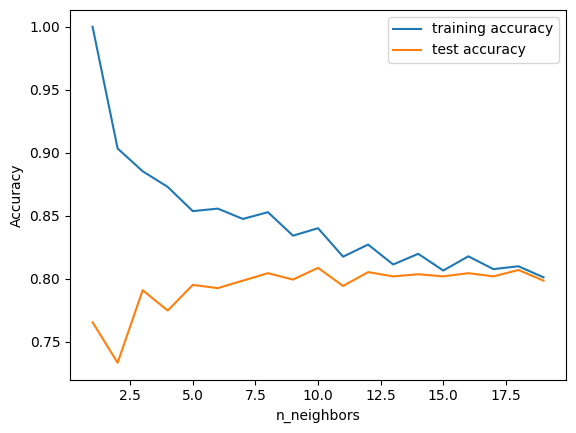

In [63]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:2657
Size of validation set:886
Size of test set:1182


In [66]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_train, y_train)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_train, y_train)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 14
Best score on validation set: 0.8103837471783296
Score on training/validation set: 0.8121942039894618
Score on test set: 0.7969543147208121


In [67]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_train, y_train)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_train, y_train)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 12
Best average score: 0.7862289905554848
Score on training/validation set: 0.8212269476853594
Score on test set: 0.7978003384094755


In [68]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [69]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, features, target, cv=loo)

In [70]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1. 1. 1. ... 1. 1. 1.]


In [71]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.7437037037037038


In [72]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.4365873392588216


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform leave-one-out cross ("loo") validation
    scores = cross_val_score(knn, X_train, y_train, cv=loo) 
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_train, y_train)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_train, y_train)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 5
Best average score: 0.7858487015430937
Score on training/validation set: 0.8502070003763643
Score on test set: 0.7817258883248731


In [74]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.88
Precision: 0.87
Recall: 0.83
F1 Score: 0.85
Confusion Matrix:
[[420  86]
 [ 61 615]]
